In [72]:
import numpy as np
import pandas as pd
import networkx as nx

In [73]:
full_music_data = pd.read_csv('full_music_data.csv')

In [74]:
influence_data = pd.read_csv('influence_data.csv')
G=nx.DiGraph()
for index, row in influence_data.iterrows():
    G.add_edge(row.influencer_id, row.follower_id)


In [75]:
full_music_data = full_music_data[1964==full_music_data.year]
full_music_data

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored)
780,"[""The Rockin' Berries""]",[486115],0.428,0.546,0.469,107.651,-8.320,1,2,0.579,0.000000,0.1220,0.0329,0,159227,28,1964,1/1/1964,He's in Town
1292,['Jack Jones'],[778363],0.487,0.288,0.594,88.397,-12.411,1,7,0.477,0.000000,0.4320,0.0380,0,162547,16,1964,1/1/1964,*** Loves Me
1297,['Jack Jones'],[778363],0.419,0.346,0.714,83.728,-11.528,1,2,0.784,0.000000,0.0685,0.0594,0,132360,25,1964,1/1/1964,Real Live ****
1582,['Tito Rodriguez'],[932299],0.318,0.406,0.524,90.990,-7.866,1,5,0.789,0.000000,0.5900,0.0313,0,193733,19,1964,12/31/1964,Hoja Seca
1583,['Tito Rodriguez'],[932299],0.272,0.348,0.356,80.106,-9.763,1,5,0.600,0.000003,0.2240,0.0312,0,179467,19,1964,12/31/1964,Qué Te Importa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96467,['Wes Montgomery'],[248392],0.537,0.466,0.740,156.339,-12.743,0,11,0.876,0.224000,0.1330,0.0526,0,172427,14,1964,1964,Movin' Wes - Pt. *
96479,['Wes Montgomery'],[248392],0.760,0.599,0.945,132.465,-11.929,1,0,0.841,0.698000,0.1230,0.0296,0,209227,33,1964,1964,Movin' Wes - Pt. *
96485,['Wes Montgomery'],[248392],0.478,0.537,0.534,143.212,-10.856,0,9,0.908,0.532000,0.3130,0.0449,0,156560,28,1964,1964,Caravan
98014,['Yves Montand'],[695189],0.291,0.142,0.270,110.683,-16.337,1,8,0.943,0.000011,0.1210,0.0365,0,196867,31,1964,1/20/1964,La vie en rose


In [76]:
candidates = set()
for index, row in full_music_data.iterrows():
    candidate =[int(i) for i in row.artists_id[1:-1].split(', ')]

    candidates = candidates | set(candidate)

candidates = candidates & set(G.nodes())

In [77]:
eliminated = set()
for data in candidates:
    eliminated = eliminated | set(G[data])

In [78]:
left_candidates = candidates - eliminated

In [79]:
and_score = pd.read_csv('and_score.csv',index_col=0,encoding='ISO-8859-1')

In [80]:
and_score

,name,genre,descendants,betweenness_centrality,eigenvector_centrality,genres_diversity,influence_by_loyalty,score
artist_id,,,,,,,,
754032,The Beatles,Pop/Rock,3758,0.017854,2.480000e-05,18,72.915701,5.871181e-01
423829,Miles Davis,Jazz,3588,0.024155,2.090000e-05,18,19.533789,5.205012e-01
583959,Willie Nelson,Country,1453,0.037038,3.112440e-04,14,5.200698,4.790636e-01
102050,The Kingston Trio,Folk,2195,0.029905,3.050000e-05,16,2.317591,4.575855e-01
33161,Sly & the Family Stone,R&B;,2932,0.021835,4.640000e-05,18,6.813955,4.439420e-01
...,...,...,...,...,...,...,...,...
833539,Mark Morrison,R&B;,0,0.000000,2.120000e-28,0,0.000000,3.370000e-28
847703,Jerry Ross,Pop/Rock,0,0.000000,2.120000e-28,0,0.000000,3.370000e-28
921888,Alborosie,Reggae,0,0.000000,2.120000e-28,0,0.000000,3.370000e-28


In [82]:
ccc=[]
Index=[]
for candidate in left_candidates:
    ccc.append(and_score.loc[candidate,'score'])
    Index.append(candidate)
print(ccc.index(max(ccc)))
print(ccc[51])
print(Index[51])

51
0.31387635
824022


In [83]:
and_score.loc[317093,'name']

'Nat King Cole'

In [71]:
influence_data[influence_data.follower_id==754032]

,influencer_id,influencer_name,influencer_main_genre,influencer_active_start,follower_id,follower_name,follower_main_genre,follower_active_start
31334,29334,Slim Whitman,Country,1940,754032,The Beatles,Pop/Rock,1960
31335,35021,Smokey Robinson & the Miracles,R&B;,1950,754032,The Beatles,Pop/Rock,1960
31336,38490,The Band,Pop/Rock,1960,754032,The Beatles,Pop/Rock,1960
31337,46699,The Everly Brothers,Pop/Rock,1950,754032,The Beatles,Pop/Rock,1960
31338,55128,Bo Diddley,Pop/Rock,1940,754032,The Beatles,Pop/Rock,1960
31339,66915,Bob Dylan,Pop/Rock,1960,754032,The Beatles,Pop/Rock,1960
31340,90803,King Curtis,R&B;,1950,754032,The Beatles,Pop/Rock,1960
31341,117001,Barrett Strong,R&B;,1950,754032,The Beatles,Pop/Rock,1960
31342,120521,Chuck Berry,Pop/Rock,1950,754032,The Beatles,Pop/Rock,1960
31343,135024,Larry Williams,R&B;,1950,754032,The Beatles,Pop/Rock,1960


In [91]:
import numpy as np
def norm_cross_corr(set1, set2):
    set1 = pd.Series(set1)
    set2 = pd.Series(set2)
    diff_set1=(set1-set1.shift()).dropna()
    diff_set2=(set2-set2.shift()).dropna()

    return np.sum(diff_set1 * diff_set2) / (np.linalg.norm(diff_set1) * np.linalg.norm(diff_set2))

a = np.array([1, 2, -2, 4, 2, 3, 1, 0])
b = np.array([2, 3, -2, 3, 2, 4, 1, -1])
c = np.array([-2, 0, 4, 0, 1, 1, 0, -2])

print(f"Normalized Cross Correlation a,b: {norm_cross_corr(a, b)}")
print(f"Normalized Cross Correlation a,c: {norm_cross_corr(a, c)}")
print(f"Normalized Cross Correlation b,c: {norm_cross_corr(b, c)}")

Normalized Cross Correlation a,b: 0.955533085905909
Normalized Cross Correlation a,c: -0.6998542122237651
Normalized Cross Correlation b,c: -0.5944300934137097


In [198]:
beatles = pd.read_csv('beatles.csv',index_col=0)
nat_king = pd.read_csv('nat_king.csv',index_col=0)


In [199]:
# beatles = beatles.dropna()
# beatles

In [200]:

# nat_king = nat_king.dropna()
# nat_king

In [201]:
all_genre_mean = pd.read_csv('all_genre_mean.csv',index_col=0)


In [202]:
# all_genre_mean 

In [142]:
set1 = all_genre_mean.loc[beatles.index,'Instrumental Component']

In [143]:
set2 = beatles['Instrumental Component']

In [144]:
set3 = all_genre_mean.loc[nat_king.index,'Instrumental Component']

In [145]:
set4 = nat_king['Instrumental Component']

In [146]:
import numpy as np
def norm_cross_corr(set1, set2):
    set1 = pd.Series(set1)
    set2 = pd.Series(set2)
    diff_set1=(set1-set1.shift()).dropna()
    diff_set2=(set2-set2.shift()).dropna()

    return np.sum(diff_set1 * diff_set2) / (np.linalg.norm(diff_set1) * np.linalg.norm(diff_set2))

a = np.array([1, 2, -2, 4, 2, 3, 1, 0])
b = np.array([2, 3, -2, 3, 2, 4, 1, -1])
c = np.array([-2, 0, 4, 0, 1, 1, 0, -2])

print(f"Normalized Cross Correlation between beatles and the musical industry: {norm_cross_corr(set1, set2)}")
print(f"Normalized Cross Correlation between nat_king and the musical industry: {norm_cross_corr(set3, set4)}")

Normalized Cross Correlation between beatles and the musical industry: 0.40846115807138844
Normalized Cross Correlation between nat_king and the musical industry: 0.05271414730161377


In [203]:
list(x_nat_king)

[1949,
 1952,
 1954,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1964,
 1965,
 1966,
 1967,
 1987,
 1991,
 1992,
 1993,
 1996,
 1999,
 2001,
 2003,
 2009]

In [204]:
list(nat_king['Instrumental Component'])

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 2.5747821972519267,
 nan,
 nan,
 2.7283135272904477,
 nan,
 0.1853325846662359,
 nan,
 0.49380218358878397,
 0.10903070568489688,
 0.42291142805297416,
 0.2934135060226283,
 0.9063431992947446,
 0.710058594960846,
 0.4427682725756714,
 nan,
 0.5541879426254495,
 0.8283051865946002,
 0.2504704542356033,
 0.3649142125391798,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.5550417996368593,
 nan,
 nan,
 nan,
 1.2628683603469175,
 -0.12224944972976555,
 0.7736622108111243,
 nan,
 nan,
 0.9604474673078548,
 nan,
 nan,
 0.4457231105696268,
 nan,
 0.734531300712125,
 nan,
 0.8070479407875499,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.21326251575651706,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

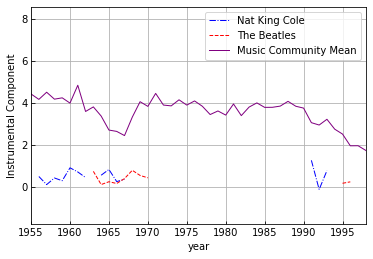

In [206]:
import matplotlib.pyplot as plt
import numpy as np
 

x_nat_king = list(nat_king.index)
y_nat_king = list(nat_king['Instrumental Component'])


x_beatles = list(beatles.index)
y_beatles = list(beatles['Instrumental Component'])

x_all = list(all_genre_mean.index)
y_all = list(all_genre_mean['Instrumental Component'])

# y1 = 2 * x + 1
# #曲线1
# y2 = x**2
# #曲线2
# plt.figure(num=3,figsize=(8,5))
plt.plot(x_nat_king,y_nat_king,color='blue',linewidth=1,linestyle='-.',label='Nat King Cole')
plt.plot(x_beatles,y_beatles,color='red',linewidth=1,linestyle='--',label='The Beatles')
plt.plot(x_all,y_all,color='purple',linewidth=1,linestyle='-',label='Music Community Mean')
plt.xlabel('year')
plt.ylabel('Instrumental Component')
plt.xlim(xmax=1998)
plt.xlim(xmin=1955)
plt.legend()
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
# plt.text(x=1951.5,#文本x轴坐标 
#          y=6.2, #文本y轴坐标
#          s='CORT between Nat King Cole and \nthe Music Industry is 0.05\nCORT between the Beatles and \nthe Music Industry is 0.41', #文本内容
#          rotation=0,#文字旋转
#          ha='left',#x=2.2是文字的左端位置，可选'center', 'right', 'left'
#          va='baseline',#y=8是文字的低端位置，可选'center', 'top', 'bottom', 'baseline', 'center_baseline'
#          fontdict=dict(fontsize=10, color='k',
#                        family='sans-serif',#字体,可选'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'
#                        weight='bold',#磅值，可选'light', 'normal', 'medium', 'semibold', 'bold', 'heavy', 'black'
                      
#                       )#字体属性设置
#         )
plt.grid()
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.savefig('Time series.png')#保存图片
plt.show()

